### UTM SHAPEFILE

Create the UTM Zones as a shapefile from scratch

In [14]:
import geopandas as gpd
from shapely.geometry import Polygon
import os

def get_hemisphere(lat_band):
    # Define southern and northern bands
    southern_bands = set(['C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M'])
    if lat_band in southern_bands:
        return 'S'
    else:
        return 'N'

def get_epsg_code(zone_num, hemisphere):
    if hemisphere == 'N':
        return 32600 + zone_num
    else:
        return 32700 + zone_num

def create_utm_zones_shapefile(shapefile_path=None):
    # Removed 'A', 'B', 'Y', 'Z' from the list
    lat_bands = [
        {'letter': 'C', 'south': -80, 'north': -72},
        {'letter': 'D', 'south': -72, 'north': -64},
        {'letter': 'E', 'south': -64, 'north': -56},
        {'letter': 'F', 'south': -56, 'north': -48},
        {'letter': 'G', 'south': -48, 'north': -40},
        {'letter': 'H', 'south': -40, 'north': -32},
        {'letter': 'J', 'south': -32, 'north': -24},
        {'letter': 'K', 'south': -24, 'north': -16},
        {'letter': 'L', 'south': -16, 'north': -8},
        {'letter': 'M', 'south': -8, 'north': 0},
        {'letter': 'N', 'south': 0, 'north': 8},
        {'letter': 'P', 'south': 8, 'north': 16},
        {'letter': 'Q', 'south': 16, 'north': 24},
        {'letter': 'R', 'south': 24, 'north': 32},
        {'letter': 'S', 'south': 32, 'north': 40},
        {'letter': 'T', 'south': 40, 'north': 48},
        {'letter': 'U', 'south': 48, 'north': 56},
        {'letter': 'V', 'south': 56, 'north': 64},
        {'letter': 'W', 'south': 64, 'north': 72},
        {'letter': 'X', 'south': 72, 'north': 84},
    ]

    zones = []

    for band in lat_bands:
        hemisphere = get_hemisphere(band['letter'])

        for zone_num in range(1, 61):
            # Skip specific zones in latitude band 'X' due to Svalbard adjustments
            if band['letter'] == 'X' and zone_num in [32, 34, 36]:
                continue

            west_long = (zone_num - 1) * 6 - 180
            east_long = zone_num * 6 - 180

            # Handle exceptions for Norway and Svalbard
            if band['letter'] == 'V':
                if zone_num == 31:
                    east_long = 3
                elif zone_num == 32:
                    west_long = 3
                    east_long = 12

            if band['letter'] == 'X':
                if zone_num == 31:
                    east_long = 9
                elif zone_num == 33:
                    west_long = 9
                    east_long = 21
                elif zone_num == 35:
                    west_long = 21
                    east_long = 33
                elif zone_num == 37:
                    west_long = 33
                    east_long = 42
                else:
                    # Other zones in band 'X' use standard boundaries
                    pass

            # Create the polygon
            polygon = Polygon([
                (west_long, band['south']),
                (east_long, band['south']),
                (east_long, band['north']),
                (west_long, band['north']),
                (west_long, band['south']),
            ])

            # Calculate additional metadata
            epsg_code = get_epsg_code(zone_num, hemisphere)
            centr_meri = -183 + (6 * zone_num)
            zone_desig = f"{zone_num}{band['letter']}"

            zones.append({
                'zone_num': zone_num,
                'lat_band': band['letter'],
                'geometry': polygon,
                'system': 'UTM',
                'hemisphere': hemisphere,
                'epsg_code': epsg_code,
                'centr_meri': centr_meri,
                'zone_desig': zone_desig
            })

    # Create GeoDataFrame and export to shapefile
    gdf = gpd.GeoDataFrame(zones)
    gdf.crs = "EPSG:4326"
    if shapefile_path is not None:
        gdf.to_file(os.path.join(shapefile_path,'utm_zones.shp'))
        print(f"UTM Zones saved as a shapefile saved at {os.path.join(shapefile_path,'utm_zones.shp')}")

    return gdf

shapefile_path = '/mnt/f/ArcticDeepSeepsData/shapefiles/utm_new/'
create_utm_zones_shapefile(shapefile_path)
# gdf = create_utm_zones_shapefile()


UTM Zones saved as a shapefile saved at /mnt/f/ArcticDeepSeepsData/shapefiles/utm_new/utm_zones.shp


,zone_num,lat_band,geometry,system,hemisphere,epsg_code,centr_meri,zone_desig
0,1,C,"POLYGON ((-180 -80, -174 -80, -174 -72, -180 -...",UTM,S,32701,-177,1C
1,2,C,"POLYGON ((-174 -80, -168 -80, -168 -72, -174 -...",UTM,S,32702,-171,2C
2,3,C,"POLYGON ((-168 -80, -162 -80, -162 -72, -168 -...",UTM,S,32703,-165,3C
3,4,C,"POLYGON ((-162 -80, -156 -80, -156 -72, -162 -...",UTM,S,32704,-159,4C
4,5,C,"POLYGON ((-156 -80, -150 -80, -150 -72, -156 -...",UTM,S,32705,-153,5C
...,...,...,...,...,...,...,...,...
1192,56,X,"POLYGON ((150 72, 156 72, 156 84, 150 84, 150 ...",UTM,N,32656,153,56X
1193,57,X,"POLYGON ((156 72, 162 72, 162 84, 156 84, 156 ...",UTM,N,32657,159,57X
1194,58,X,"POLYGON ((162 72, 168 72, 168 84, 162 84, 162 ...",UTM,N,32658,165,58X
1195,59,X,"POLYGON ((168 72, 174 72, 174 84, 168 84, 168 ...",UTM,N,32659,171,59X


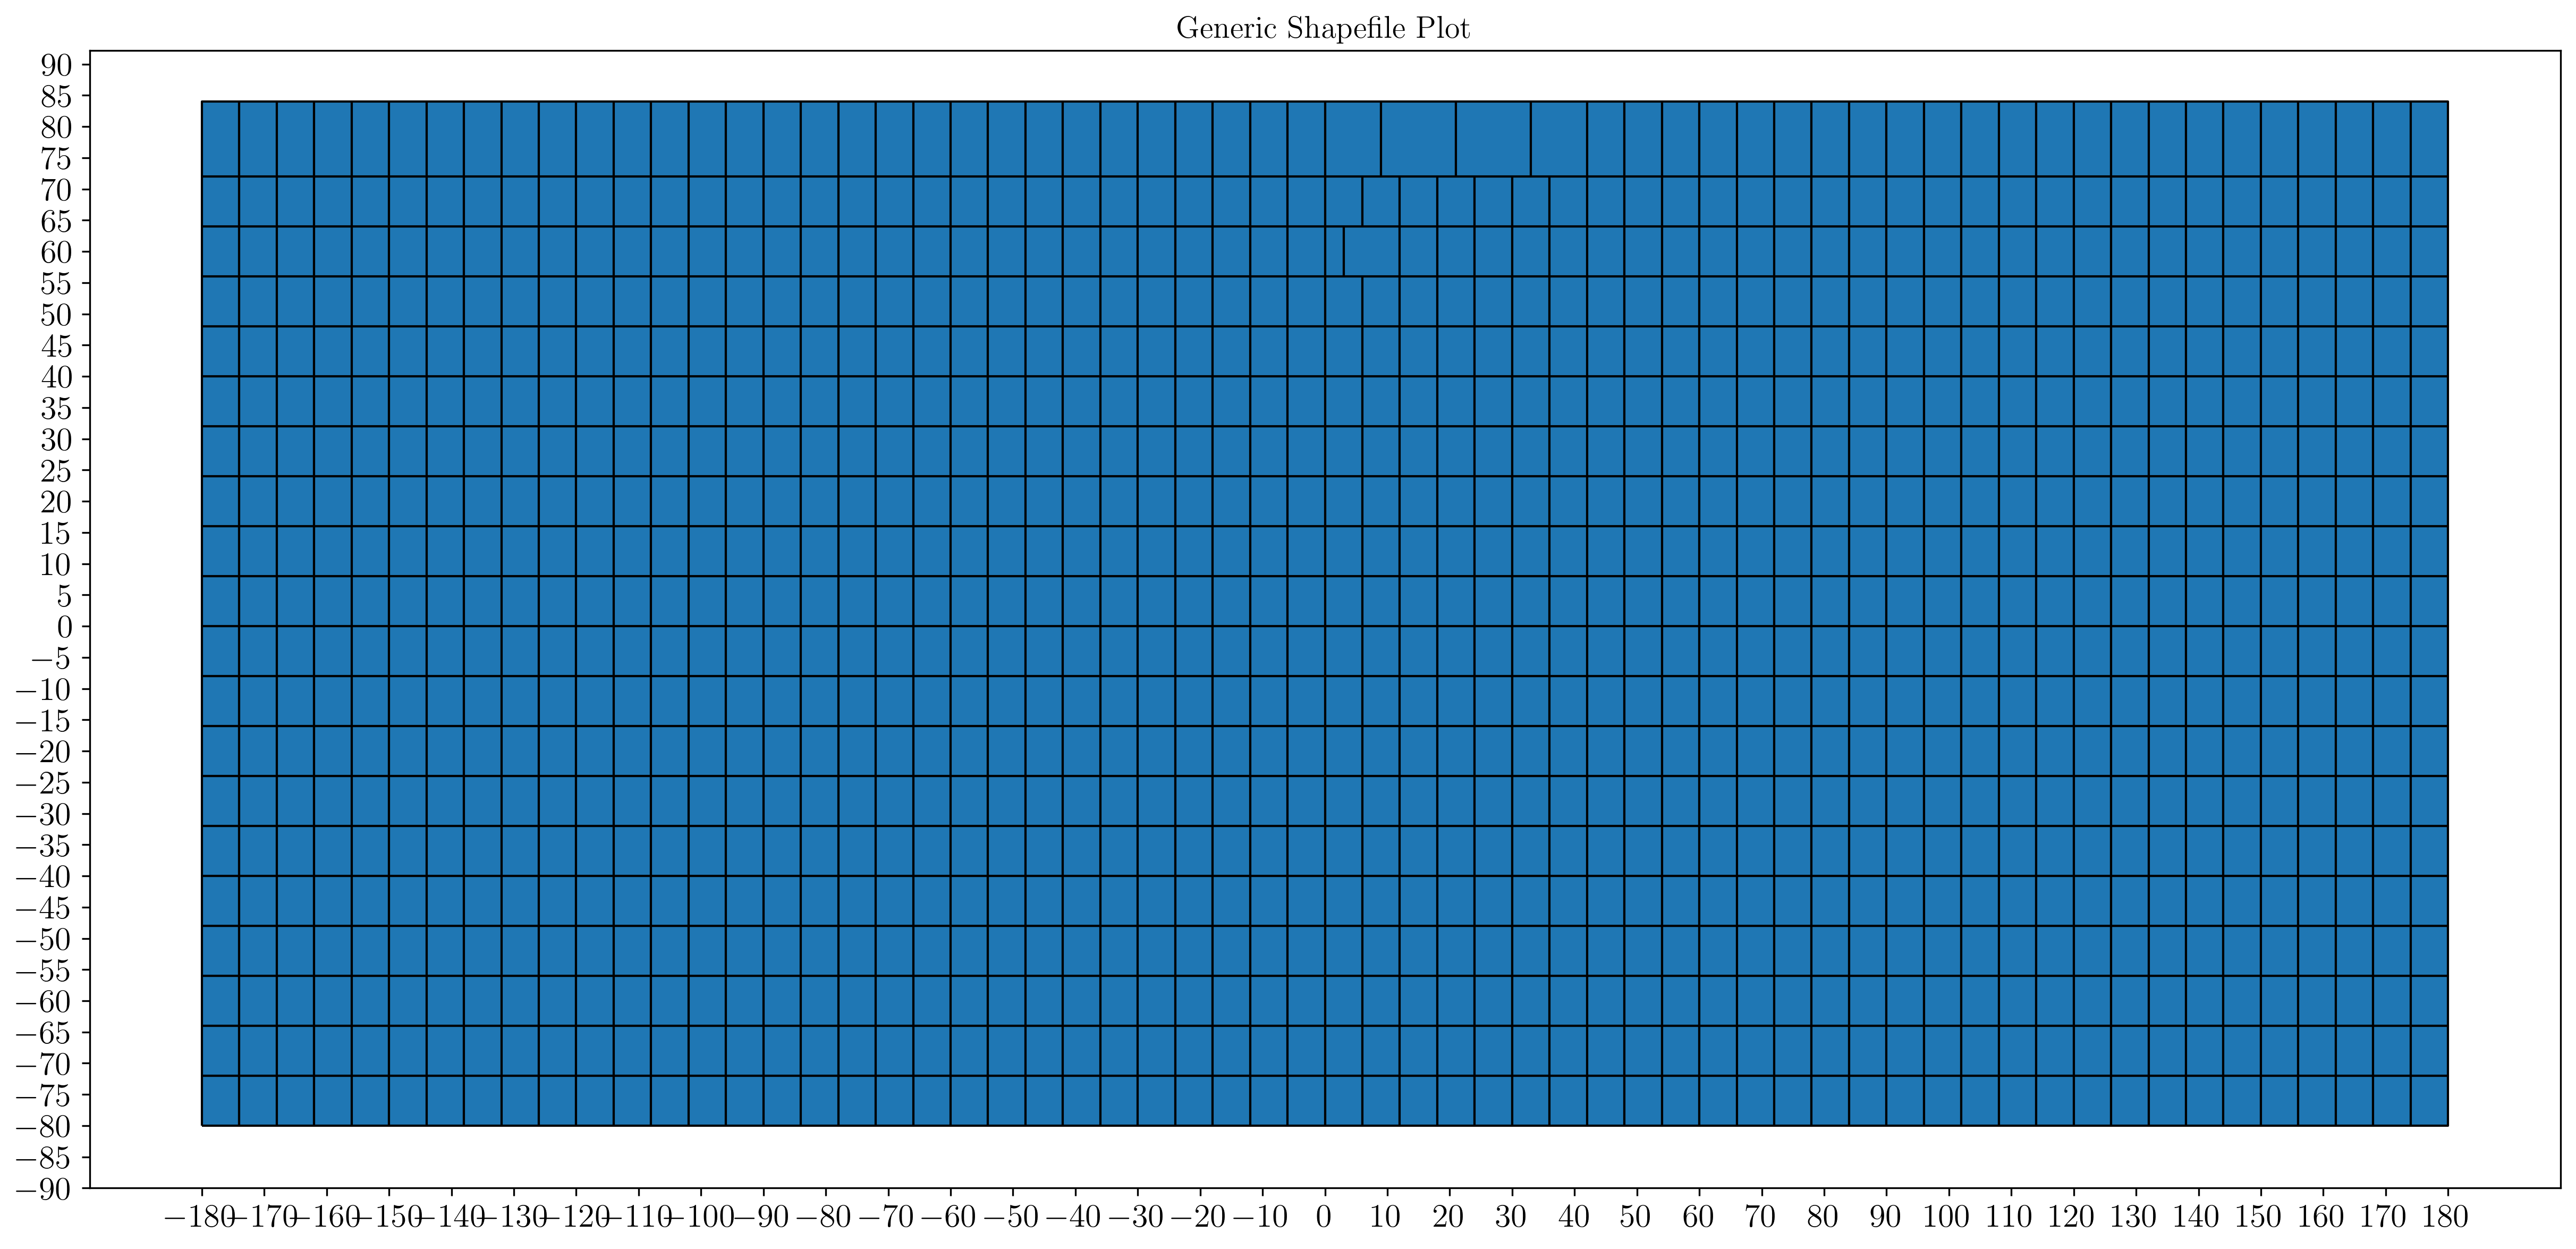

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
gdf = gpd.read_file(shapefile_path)

# Create the plot
fig, ax = plt.subplots(figsize=(20, 20), dpi=300)

# Plot the shapefile
gdf.plot(ax=ax, edgecolor='black')

# Set plot title
ax.set_title('Generic Shapefile Plot')

# Set tick marks 
ax.set_xticks(range(-180, 181, 10))
ax.set_yticks(range(-90, 91, 5))

# Show the plot
plt.show()

Plot North Pole with UTM Grid

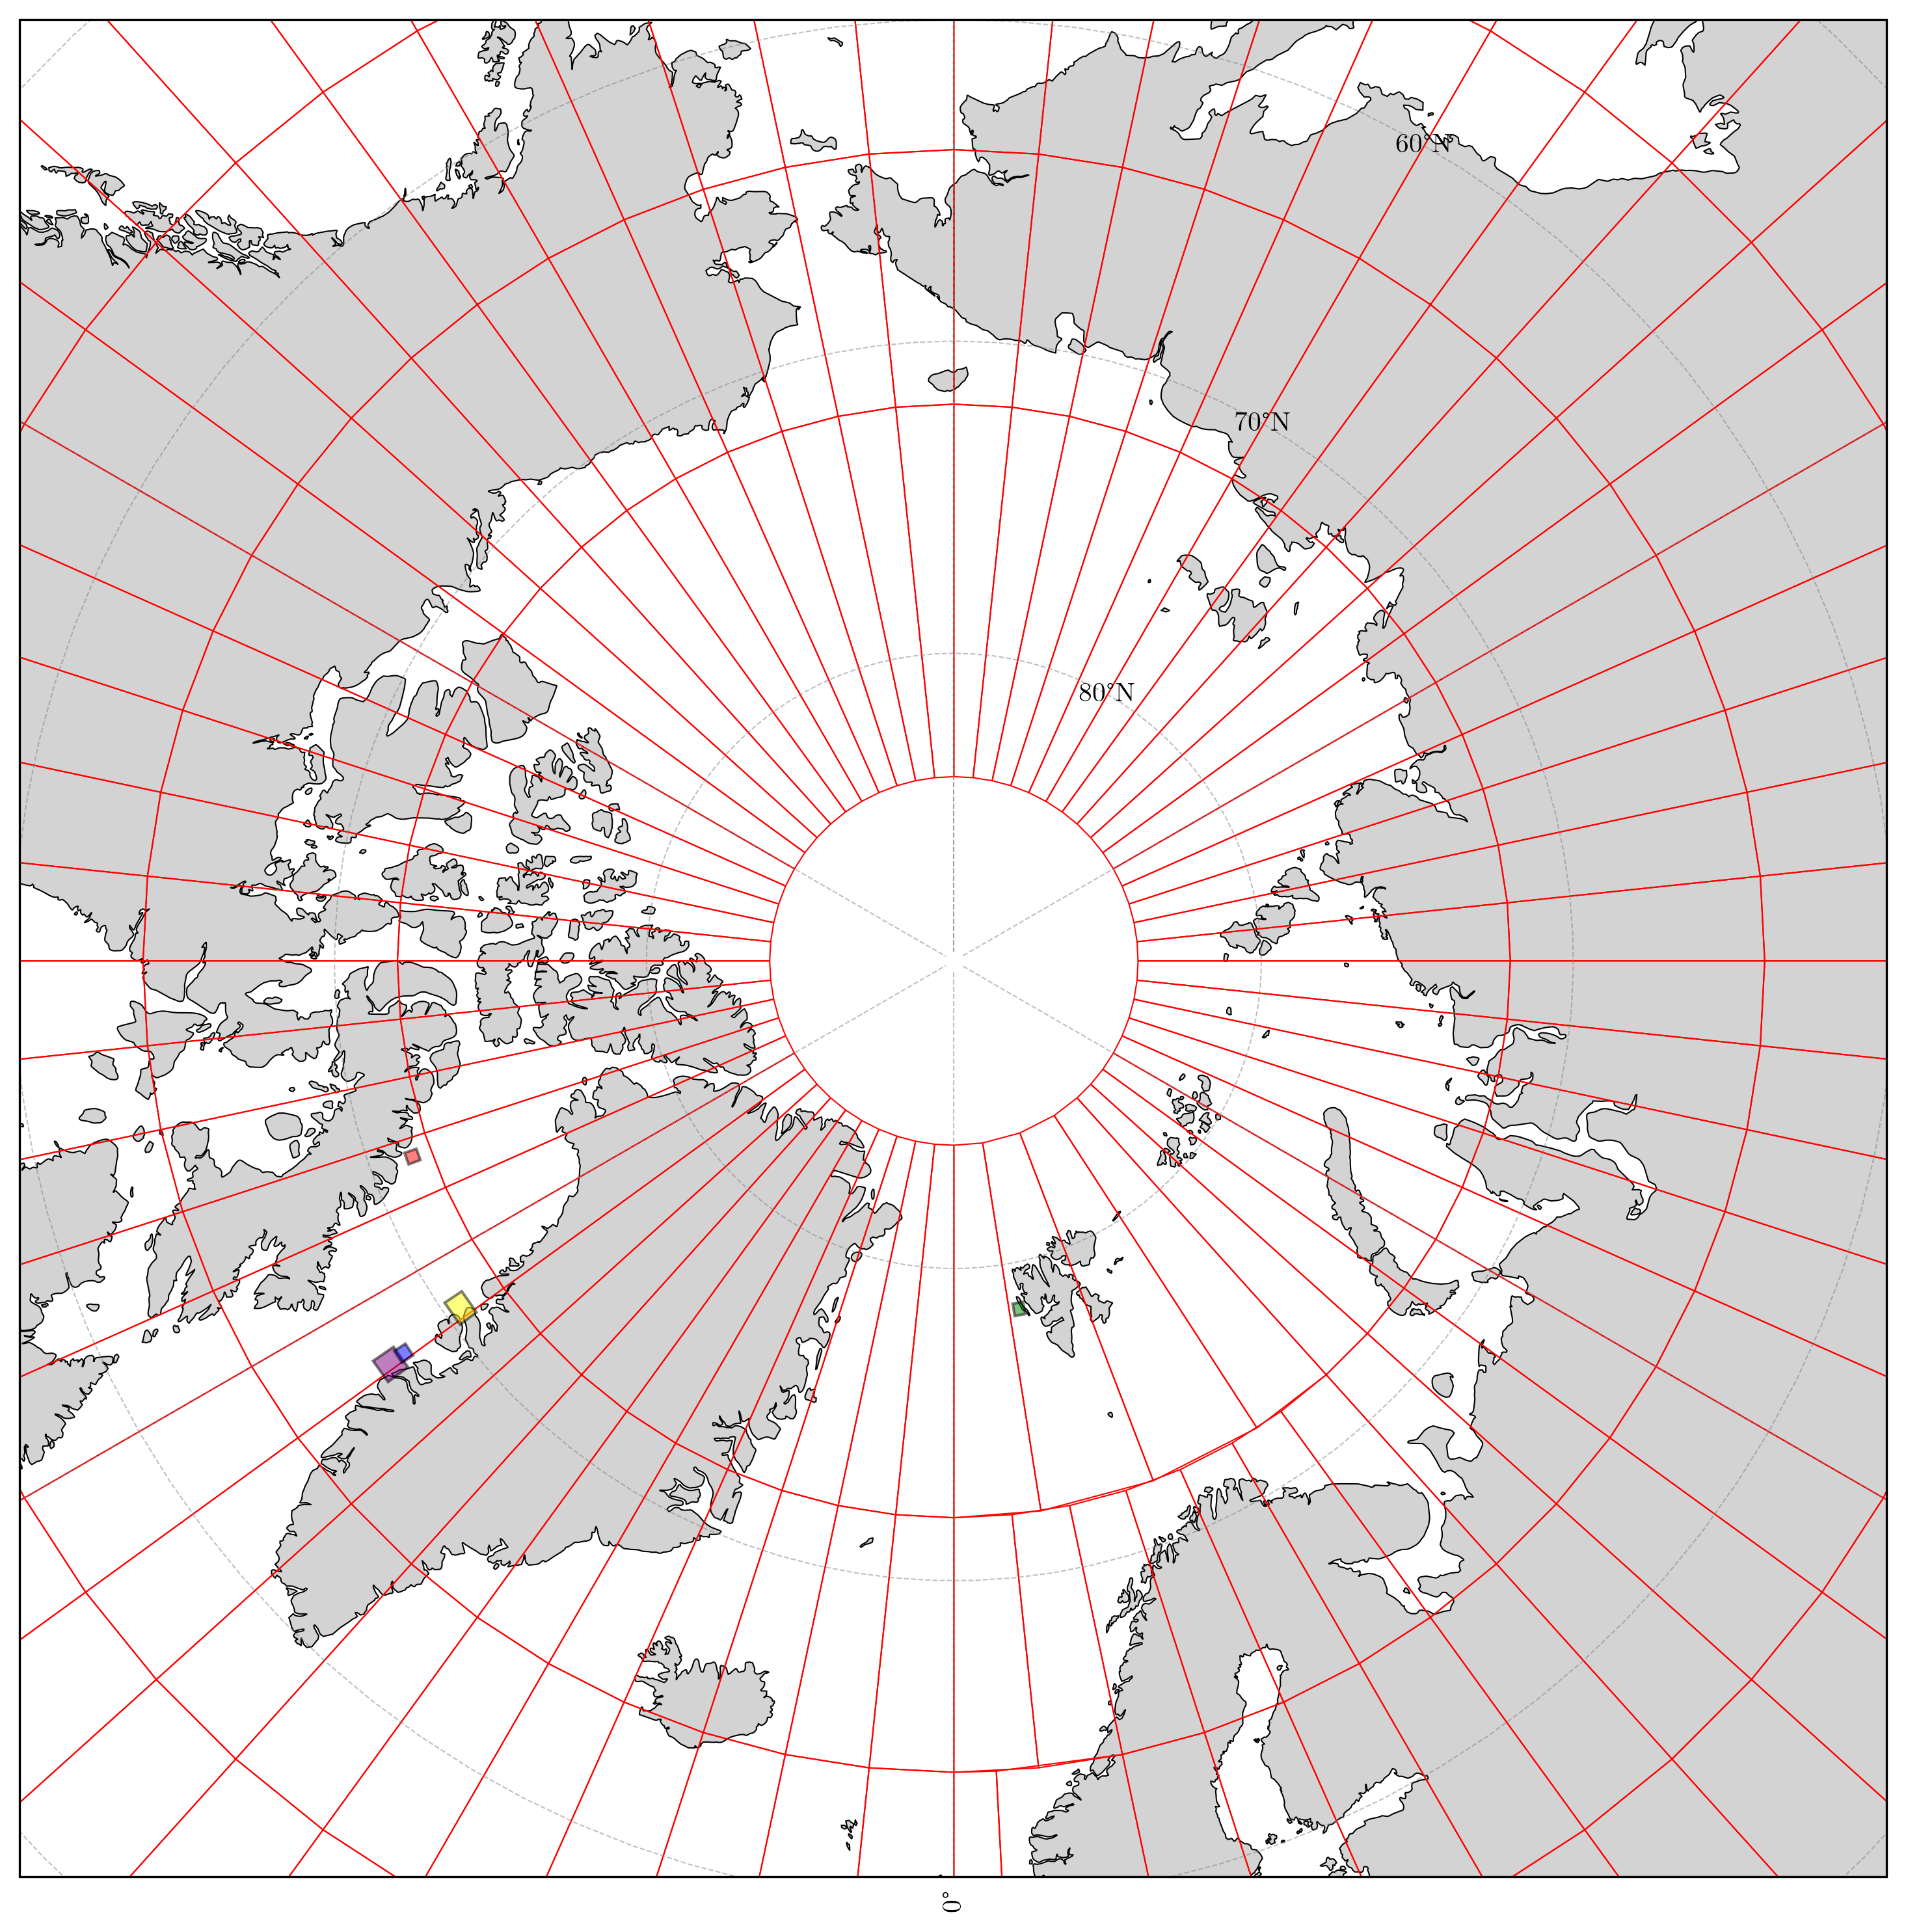

In [41]:
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Polygon as MplPolygon


def plot_UTM_zones(extend, shapefile_path=None, polygons_list=None):

    # Load the shapefile
    if shapefile_path is not None:
        gdf = gpd.read_file(shapefile_path)

    # Ensure the GeoDataFrame has the correct CRS (WGS84)
    if gdf.crs is None:
        gdf.set_crs(epsg=4326, inplace=True)
    elif gdf.crs.to_epsg() != 4326:
        gdf = gdf.to_crs(epsg=4326)

    # Create a square figure to maintain aspect ratio
    plt.figure(figsize=(10, 10), dpi=300)
    ax = plt.axes(projection=ccrs.NorthPolarStereo())

    # Add Cartopy's built-in features with higher resolution
    ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='lightgray', edgecolor='black', linewidth=0.5)

    # Plot the UTM zones
    gdf.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        edgecolor='red',
        facecolor='none',
        linewidth=0.5
    )

    # Set latitude and longitude limits
    ax.set_extent(extend, crs=ccrs.PlateCarree())

    # Add gridlines (optional)
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}

    # List to store polygon patches for the legend
    polygon_patches = []
    # Iterate over the list directly
    for name, color, wkt_polygon in polygons_list:
        # Parse the WKT string into a shapely geometry
        polygon_geom = wkt.loads(wkt_polygon)
        
        # Create a Matplotlib Polygon patch
        polygon_patch = MplPolygon(
            list(polygon_geom.exterior.coords),
            closed=True,
            edgecolor='black',
            facecolor=color,  # Corrected facecolor assignment
            linewidth=1,
            alpha=0.5,  # Add transparency
            transform=ccrs.PlateCarree(),
            label=name  # Add label for the legend
        )
        
        # Add the polygon patch to the axes
        ax.add_patch(polygon_patch)
        # Append the patch to the list
        polygon_patches.append(polygon_patch)

    plt.tight_layout()
    plt.show()

extend = [-180, 180, 60, 90]
polygons_list = [
    ('Scott Trough', 'red', 'POLYGON((-70.75 71.19,-69.55 71.19,-69.55 71.59,-70.75 71.59,-70.75 71.19))'),
    ('Western Svalbard', 'green', 'POLYGON((9.74 78.3,11.45 78.3,11.45 78.7,9.74 78.7,9.74 78.3))'),
    ('Nussaq', 'yellow', 'POLYGON ((-56.14 70.20, -56.14 70.85, -53.66 70.85, -53.66 70.20, -56.14 70.20))'),
    ('Attu', 'purple', 'POLYGON((-55.46 67.30, -53.36 67.30, -53.36 68.08, -55.46 68.08, -55.46 67.30))'),
    ('Kangaat', 'blue', 'POLYGON((-55.10979969474843 68.44536073505672,-53.90696642393627 68.42745327139977,-53.96309992205016 68.00813587214579,-55.14414440975267 68.02566791055716,-55.10979969474843 68.44536073505672))')
]


plot_UTM_zones(extend, shapefile_path, polygons_list)

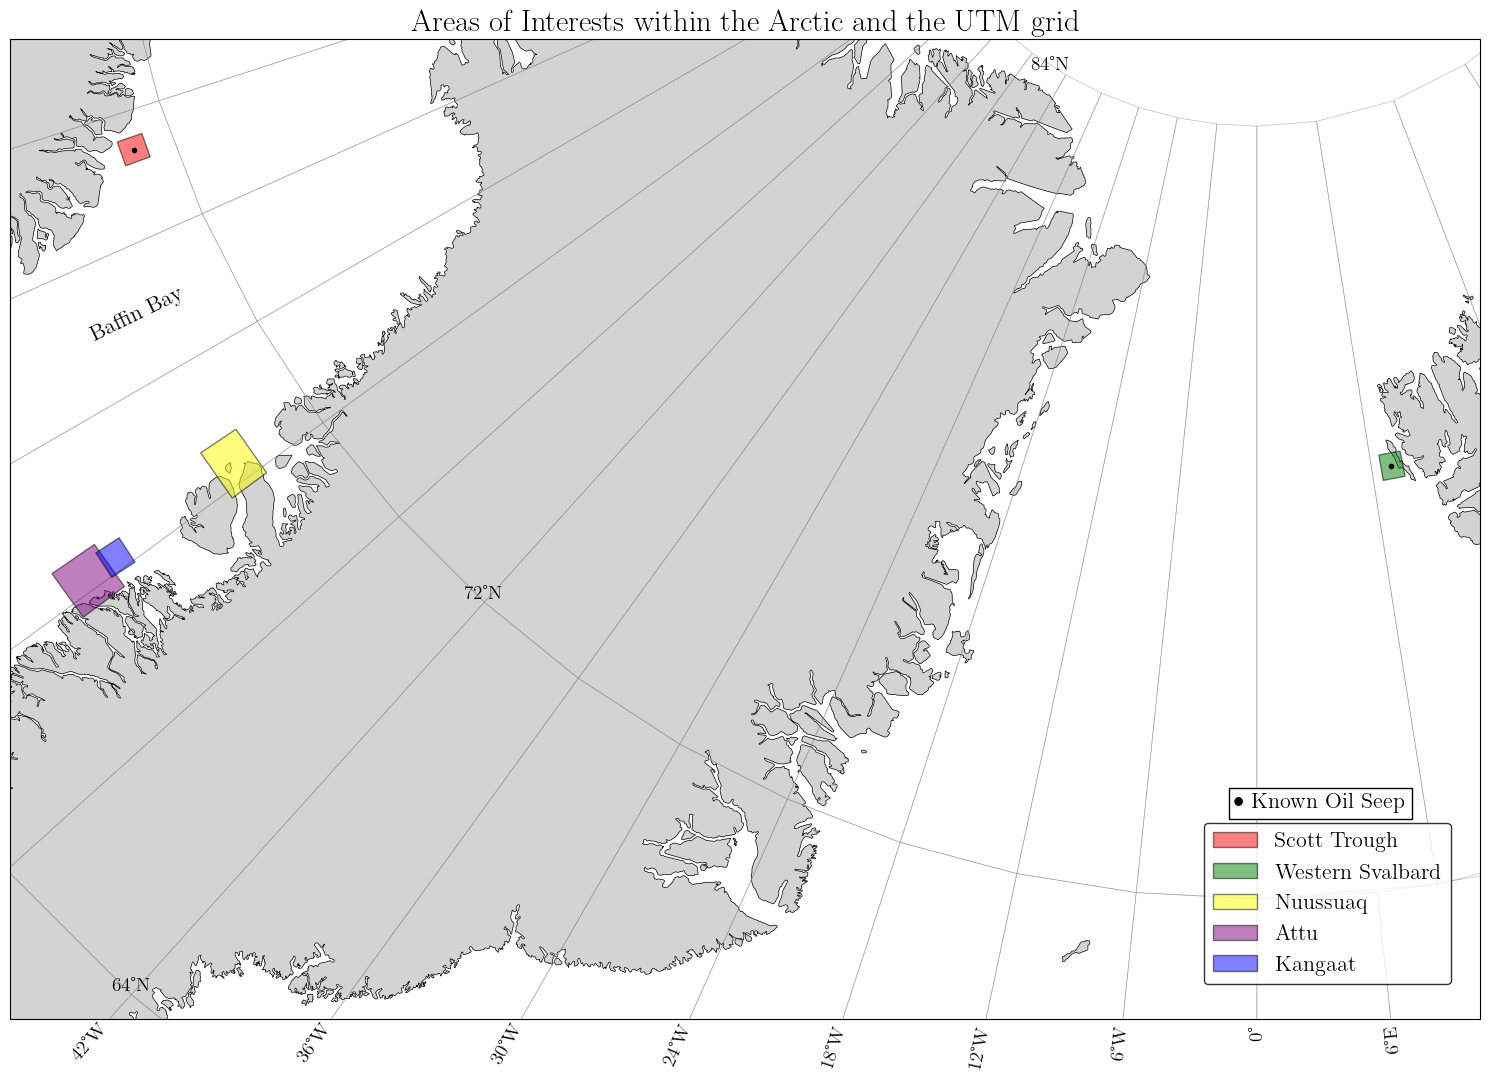

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely import wkt
from matplotlib.patches import Polygon as MplPolygon
import matplotlib.ticker as mticker  # Import mticker

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "axes.titlesize": 14,
    "axes.labelsize": 13,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "legend.fontsize": 12,
    "figure.titlesize": 16,
    "lines.linewidth": 1,  # Set the default line width for all plots
    # set subplotbackroundcolor
    "axes.facecolor": "white"
})

# Path to your UTM zones shapefile
# shapefile_path = '/home/mtontsch/Nextcloud/data_nextcloud/shapefiles/utm/utm_zones.shp'

# Read the UTM zones shapefile
gdf = gpd.read_file(shapefile_path)

# Ensure the GeoDataFrame has the correct CRS (WGS84)
if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)
elif gdf.crs.to_epsg() != 4326:
    gdf = gdf.to_crs(epsg=4326)


polygons_list = [
    ('Scott Trough', 'red', 'POLYGON((-70.75 71.19,-69.55 71.19,-69.55 71.59,-70.75 71.59,-70.75 71.19))'),
    ('Western Svalbard', 'green', 'POLYGON((9.74 78.3,11.45 78.3,11.45 78.7,9.74 78.7,9.74 78.3))'),
    # ('Disco Island', 'purple', 'POLYGON((-56.50 71.00, -56.52 70.00, -52.29 69.94, -52.30 70.94, -56.50 71.00))'),
    ('Nuussuaq', 'yellow', 'POLYGON ((-56.14 70.20, -56.14 70.85, -53.66 70.85, -53.66 70.20, -56.14 70.20))'),
    ('Attu', 'purple', 'POLYGON((-55.46 67.30, -53.36 67.30, -53.36 68.08, -55.46 68.08, -55.46 67.30))'),
    ('Kangaat', 'blue', 'POLYGON((-55.10979969474843 68.44536073505672,-53.90696642393627 68.42745327139977,-53.96309992205016 68.00813587214579,-55.14414440975267 68.02566791055716,-55.10979969474843 68.44536073505672))')
]

points_list = [
    # ('Kangaat Point', 'black', 'POINT(-53.925 68.2917)'),
    ('Western Svalbard Point', 'black', 'POINT(10.522 78.492)'),
    ('Scott Trough Point', 'black', 'POINT(-70.15 71.39)')  # Example point, adjust as needed
]


# Create a square figure to maintain aspect ratio
fig = plt.figure(figsize=(15, 15))  # Adjust size as needed


projection_1 =ccrs.NorthPolarStereo()

projection_2 = ccrs.Stereographic(
    central_longitude=-45,
    central_latitude=90,
    true_scale_latitude=90  # specify your desired true-scale latitude
)

projection_3 = ccrs.epsg(6931)
# Manually define Lambert Azimuthal Equal Area with north pole center
projection_4 = ccrs.LambertAzimuthalEqualArea(
    central_longitude=-45,
    central_latitude=90,
    false_easting=0,
    false_northing=0,
    globe=ccrs.Globe(datum='WGS84', ellipse='WGS84')
)
projection_5 = ccrs.epsg(3408)

ax = plt.axes(projection=projection_1)

# Add Cartopy's built-in features with higher resolution
ax.add_feature(cfeature.LAND.with_scale('10m'), facecolor='lightgray', edgecolor='black', linewidth=0.5)

# Plot the UTM zones
gdf.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    edgecolor='grey',
    alpha=0.5,
    facecolor='none',
    linewidth=0.5
)

# List to store polygon patches for the legend
polygon_patches = []
# Iterate over the list directly
for name, color, wkt_polygon in polygons_list:
    # Parse the WKT string into a shapely geometry
    polygon_geom = wkt.loads(wkt_polygon)
    
    # Create a Matplotlib Polygon patch
    polygon_patch = MplPolygon(
        list(polygon_geom.exterior.coords),
        closed=True,
        edgecolor='black',
        facecolor=color,  # Corrected facecolor assignment
        linewidth=1,
        alpha=0.5,  # Add transparency
        transform=ccrs.PlateCarree(),
        label=name  # Add label for the legend
    )
    
    # Add the polygon patch to the axes
    ax.add_patch(polygon_patch)
    
    # Append the patch to the list
    polygon_patches.append(polygon_patch)

for name, color, wkt_point in points_list:
    # Parse the WKT string into a shapely geometry
    try:
        point_geom = wkt.loads(wkt_point)
    except Exception as e:
        print(f"Error parsing WKT for {name}: {e}")
        continue  # Skip this point

    # Extract longitude and latitudeW
    lon, lat = point_geom.x, point_geom.y

    # Plot the point
    point = ax.plot(
        lon,
        lat,
        marker='o',
        markersize=3,
        markeredgecolor='black',
        markerfacecolor=color,
        transform=ccrs.PlateCarree(),
        label=name
    )


# Set latitude and longitude limits
min_latitude = 70    # Set your desired minimum latitude
max_latitude = 71   # Set your desired maximum latitude
min_longitude = -76  # Set your desired minimum longitude
max_longitude = 10   # Set your desired maximum longitude
ax.set_extent([min_longitude, max_longitude, min_latitude, max_latitude], crs=ccrs.PlateCarree())

# Add for 
gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.0, linestyle='--') 
gl.bottom_labels = True  
gl.xlabel_style = {'size': 14}
gl.xlocator = mticker.FixedLocator(range(-180, 181, 6))  # Longitude ticks every 6 degrees

# Customizing latitude labels at a specific locations
desired_label_longitude = -42  
for lat in (84, 72, 64):
    x = desired_label_longitude
    y = lat
    if lat == 84:
        x = x + 10
        y = y - 0.1
    ax.text(x, y,
        f"{lat}°N",
        transform=ccrs.PlateCarree(),
        horizontalalignment='center',
        verticalalignment='bottom',
        fontsize=14,
        color='black')
    

# Add a legend
ax.legend(handles=polygon_patches, bbox_to_anchor=(0.98, 0.2), borderaxespad=0., fontsize=16, edgecolor='black')

# Add textbox below legend with a black dot next to the text "Oil Seep"
ax.text(0.95, 0.23, '\u2022 Known Oil Seep', verticalalignment='top', horizontalalignment='right',
    transform=ax.transAxes, fontsize=16, bbox=dict(facecolor='white', edgecolor='black'))

# Add turned textbox
ax.text(0.12, 0.75, 'Baffin Bay', verticalalignment='top', horizontalalignment='right',
    transform=ax.transAxes, fontsize=16, bbox=dict(facecolor='white', edgecolor='none'), rotation=26)


ax.set_title('Areas of Interests within the Arctic and the UTM grid', fontsize=22)

# plt.savefig('AOIs_nice.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()
